In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
import os
import json
from datetime import datetime
import inspect
import os
import sys
sys.path.append('../Classes')

import sgh_class2

import colorsys
import matplotlib.colors as mcolors
%matplotlib widget

In [2]:
# beta_a = 0.9
# beta_e = 1.1
# beta_a = 3
# beta_e = 4
x = sgh_class2.SGH_class(tree_root_active=0, shading_active=1, logistic_active=0, beta_a=1/3, beta_e=4)
y = sgh_class2.SGH_class(tree_root_active=1, shading_active=0, logistic_active=0)

In [3]:
P_values = np.linspace(0.01/180, 600/180, 300)
red = ['#fda2b7', '#d10333', '#6c011a']
yellow = ['#fde69a', '#f9c105', '#c79b04']
blue = ['#3fb5fb', '#0384d0', '#02456c']

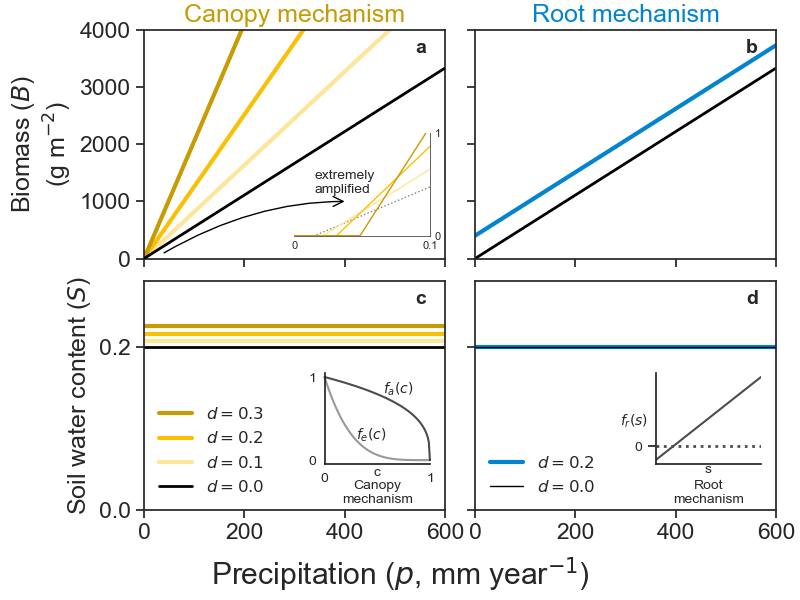

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1, top=0.95, bottom=0.15, right=0.97, left=0.18)
ax0, ax1, ax2, ax3 = axes.flatten()

# Now it's safe to create inset axes
ax4 = ax3.inset_axes([0.6, 0.2, 0.35, 0.4])  # inside ax3
ax5 = ax2.inset_axes([0.6, 0.2, 0.35, 0.4])  # inside ax2

# Hide axis details on inset plots
for inset_ax in [ax4, ax5]:
        inset_ax.set_xticks([])
        inset_ax.set_yticks([])
        inset_ax.set_xlabel('')
        inset_ax.set_ylabel('')

ax0.plot(P_values * 180,
         1000*x.analytical_solutions_no_carrying_capacity(p=P_values, c=0.0)[0],
         color='black', linestyle='-', lw=2, zorder=10000)
ax0.plot(P_values * 180,
         1000*x.analytical_solutions_no_carrying_capacity(p=P_values, c=0.1)[0],
         color=yellow[0], linestyle='-', lw=3)
ax0.plot(P_values * 180,
         1000*x.analytical_solutions_no_carrying_capacity(p=P_values, c=0.2)[0],
         color=yellow[1], linestyle='-', lw=3)
ax0.plot(P_values * 180,
         1000*x.analytical_solutions_no_carrying_capacity(p=P_values, c=0.3)[0],
         color=yellow[2], linestyle='-', lw=3)

ax1.plot(P_values * 180,
         1000*y.analytical_solutions_no_carrying_capacity(p=P_values, c=0.0)[0],
         color='black', linestyle='-', lw=2)
ax1.plot(P_values * 180,
         1000*y.analytical_solutions_no_carrying_capacity(p=P_values, c=0.2)[0],
         color=blue[1], linestyle='-', lw=3)

ones = np.ones_like(P_values)
ax2.plot(P_values * 180,
                  ones*x.analytical_solutions_no_carrying_capacity(p=P_values, c=0.3)[1],
         color=yellow[2], linestyle='-', lw=3, label=r"$d=0.3$")
ax2.plot(P_values * 180,
                  ones*x.analytical_solutions_no_carrying_capacity(p=P_values, c=0.2)[1],
         color=yellow[1], linestyle='-', lw=3, label=r"$d=0.2$")
ax2.plot(P_values * 180,
                  ones*x.analytical_solutions_no_carrying_capacity(p=P_values, c=0.1)[1],
         color=yellow[0], linestyle='-', lw=3, label=r"$d=0.1$")
ax2.plot(P_values * 180,
                  ones*x.analytical_solutions_no_carrying_capacity(p=P_values, c=0.0)[1],
         color='black', linestyle='-', lw=2, label=r"$d=0.0$")

# ax2.plot(P_values * 180, S_shade, color=yellow[1], linestyle='-', lw=3, label=r"$d=0.2$")
# ax2.plot(P_values * 180, p_d / (p_a * fa(0.1)) * np.ones_like(P_values), color=yellow[0], linestyle='-', lw=3, label=r"$d=0.1$")
# ax2.plot(P_values * 180, S_shade_zero, color=3*[0.3], linestyle=':', lw=2, label=r"$d=0.0$")
ax2.legend(frameon=False, fontsize=12, loc='lower left')

ax3.plot(P_values * 180,
         ones*y.analytical_solutions_no_carrying_capacity(p=P_values, c=0.2)[1],
         color=blue[1], linestyle='-', lw=3,
         label=fr"$d=0.2$")
ax3.plot(P_values * 180,
         ones*y.analytical_solutions_no_carrying_capacity(p=P_values, c=0.0)[1],
         color='black', linestyle='-', lw=1,
         label=r"$d=0.0$")

# ax3.plot(P_values * 180, S_tree, color=blue[1], linestyle='-', lw=3, label=fr"$d=0.2$")
# ax3.plot(P_values * 180, S_tree_zero, color=3*[0.3], linestyle=':', lw=2, label=r"$d=0.0$", zorder=10000)
ax3.legend(frameon=False, fontsize=12, loc='lower left')

ax0.set(ylabel=r'Biomass ($\mathit{B}$)' + "\n"+r'(g m$^{-2}$)',
                xlim=(0, 600),
                ylim=(0, 4000)
                )

ax1.set(ylim=(0, 4000),
        xlim=(0, 600)
        )

ax2.set(ylabel=r'Soil water content ($\mathit{S}$)',
        xlim=(0, 600),
        ylim=(0, 0.28),
        yticks=[0, 0.2]
        )

ax3.set(xlim=(0, 600),
        ylim=(0, 0.28),
        yticks=[0, 0.2]
        )

c_list = np.linspace(0,1,100)
ax5.plot(c_list, x.shading_assimilation(None, None, c=c_list), linestyle='-', color='black', alpha=0.7, label='Assimilation', clip_on=False)
ax5.plot(c_list, x.shading_transpiration(None, None, c=c_list), linestyle='-', color='black', alpha=0.4, label='Transpiration', clip_on=False)
ax5.set(xlim=(0, 1),
        )
ax5.set_xlabel('c', labelpad=-13, fontsize=10)
ax5.text(0.5, -0.17, 'Canopy\nmechanism', fontsize=10, ha='center', va='top', transform=ax5.transAxes)
ax5.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True, pad=0)
ax5.set_xticks([0,1])
ax5.set_xticklabels([0,1], fontsize=10)
ax5.set_yticks([0,1])
ax5.set_yticklabels([0,1], fontsize=10)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.text(0.55,0.8, r"$f_a(c)$", fontsize=10)
ax5.text(0.3,0.25, r"$f_e(c)$", fontsize=10)

s_list = np.linspace(0.3,0.6,100)
ax4.plot(s_list, y.tree_root_function(None, s_list, c=0.2), color='black', alpha=0.7, linestyle='-')
ax4.axhline(y=0, color=3*[0.3], linestyle=':', lw=2)
ax4.set(xlim=(s_list.min(), s_list.max()))
ax4.text(0.5,-0.17, 'Root\nmechanism', fontsize=10, ha='center', va='top', transform=ax4.transAxes)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xlabel('s', labelpad=0, fontsize=10)
ax4.set_yticks([0])
ax4.set_yticklabels([0], fontsize=10)
ax4.text(0.28,0.6, r"$f_r(s)$", fontsize=10, ha="right")


ax0.text(0.9, 0.9, 'a', transform=ax0.transAxes, fontsize=14, fontweight='bold')
ax1.text(0.9, 0.9, 'b', transform=ax1.transAxes, fontsize=14, fontweight='bold')
ax2.text(0.9, 0.9, 'c', transform=ax2.transAxes, fontsize=14, fontweight='bold')
ax3.text(0.9, 0.9, 'd', transform=ax3.transAxes, fontsize=14, fontweight='bold')

fig.supxlabel(r'Precipitation ($\mathit{p}$, mm year$^{-1}$)', y=0.01)


ax_zoom = ax0.inset_axes([0.5, 0.1, 0.45, 0.45])  # inside ax0
for spine in ax_zoom.spines.values():
        spine.set_linewidth(0.5)
ax_zoom.spines['left'].set_visible(False)
ax_zoom.spines['top'].set_visible(False)
p_max = 0.10
cover = [0.1, 0.2, 0.3]#, 0.4]
p_list = np.linspace(p_max/180/1000, p_max/180, 100)
ax_zoom.plot(p_list*180, 0*p_list, color='gray', linestyle='-', lw=0.5)
ax_zoom.plot(p_list*180,
             1000*x.analytical_solutions_no_carrying_capacity(p=p_list, c=0.0)[0],
             color='gray', linestyle=':', lw=1, label=r'$d=0.0$')
for i, c in enumerate(cover):
    ax_zoom.plot(p_list*180,
                 1000*x.analytical_solutions_no_carrying_capacity(p=p_list, c=c)[0],
                 color=yellow[i], linestyle='-', lw=1, label=fr'$d={c}$')
ymax = 1.0
ax_zoom.set(xlim=(0, p_max), ylim=(-0.000, ymax),)
ax_zoom.set_xticks([0, p_max])
ax_zoom.tick_params(axis='both', which='major', length=0)
ax_zoom.yaxis.tick_right()
ax_zoom.set_xticklabels([0, p_max], fontsize=8)
ax_zoom.set_yticks([0, ymax])
ax_zoom.set_yticklabels([0, '1'], fontsize=8)

ax0.set_title('Canopy mechanism', color=yellow[2])
ax1.set_title('Root mechanism', color=blue[1])

ax0.annotate(
    '',
    xy=(40, 100), xycoords='data',
    xytext=(400, 1000), textcoords='data',zorder=10000,
    arrowprops=dict(arrowstyle="<-", color="black", shrinkA=0, shrinkB=0,
                    connectionstyle="angle3,angleB=30,angleA=180"))
ax0.text(340,1100,"extremely\namplified", fontsize=10, ha='left', va='bottom',zorder=10000)
fig.savefig('steady_state_no_k_full.png', dpi=300)
fig.savefig('steady_state_no_k_full.pdf')